# Predict demand for an online classified ad – Avito Demand Prediction

## Table of Content

1.Introduction<br>
<br>
    &emsp; 1.1. Problem Statement<br>
    &emsp; 1.2. Dataset Overview<br>
    &emsp; 1.3. Real-World/Business Objective and Constraint<br>
    &emsp; 1.4. Evaluation Metrics<br>
<br>
2. Dataset Details<br>
<br>
3. Exploratory Data Analysis<br>
    &emsp; 3.1. Checking for NULL Values <br>
    &emsp; 3.2. Target Variable : deal_probability <br>
    &emsp; 3.3. Categorical Features <br>
    &emsp; &emsp; 3.3.1. item_id & user_id <br>
    &emsp; &emsp; 3.3.2. region & city <br>
    &emsp; &emsp; 3.3.3. parent_category_name & category_name <br>
    &emsp; &emsp; 3.3.4. param_1 & param_2 & param_3 <br>
    &emsp; &emsp; 3.3.5. user_type <br>
    &emsp; 3.4. Numerical Features <br>
    &emsp; &emsp; 3.4.1. price <br>
    &emsp; &emsp; 3.4.2. item_seq_number <br>
    &emsp; &emsp; 3.4.3. image_top_1 <br>
    &emsp; 3.5. Text Features  <br>
    &emsp; &emsp; 3.5.1. title <br>
    &emsp; &emsp; 3.5.2. description<br>
    &emsp; 3.6. Image Features <br>
<br>
4. Feature Engineering Pipeline<br>
    &emsp; 4.1. Fill Missing Values <br> 
    &emsp; &emsp; 4.1.1. Categorical and Text Features <br>
    &emsp; &emsp; 4.1.2. Numerical Features <br>
    &emsp; &emsp; 4.1.3. Image Feature <br>
    &emsp; 4.2. Interactive Features <br>
    &emsp; 4.3 More Features <br>
    &emsp; 4.4. Final Feature Engineering <br>
    &emsp; &emsp; 4.4.1. Categorical Features <br>
    &emsp; &emsp; 4.4.2. Numerical Features <br>
    &emsp; &emsp; 4.4.3. Text Features <br>
    &emsp; &emsp; 4.4.4. Image Features <br>
<br>
5. Machine Learning (Neural Network Architecture)<br>
<i>Please follow topic specific notebook in same directory.</i><br>
<br>
6. Results and Conclusion<br>
    



## 1. Introduction

Avito, Russia’s largest classified advertisements website, is deeply familiar with this problem. Sellers on their platform sometimes feel frustrated with both too little demand (indicating something is wrong with the product or the product listing) or too much demand (indicating a hot item with a good description was underpriced).

### 1.1. Problem Statement

In their Kaggle competition, Avito has challenged to predict demand for an online advertisement based on its full description (title, description, images, etc.), its context (geographically where it was posted, similar ads already posted) and historical demand for similar ads in similar contexts. With this information, Avito can inform sellers on how to best optimize their listing and provide some indication of how much interest they should realistically expect to receive.

When selling used goods online, a combination of tiny, nuanced details in a product description can make a big difference in drumming up interest. 

Details like:

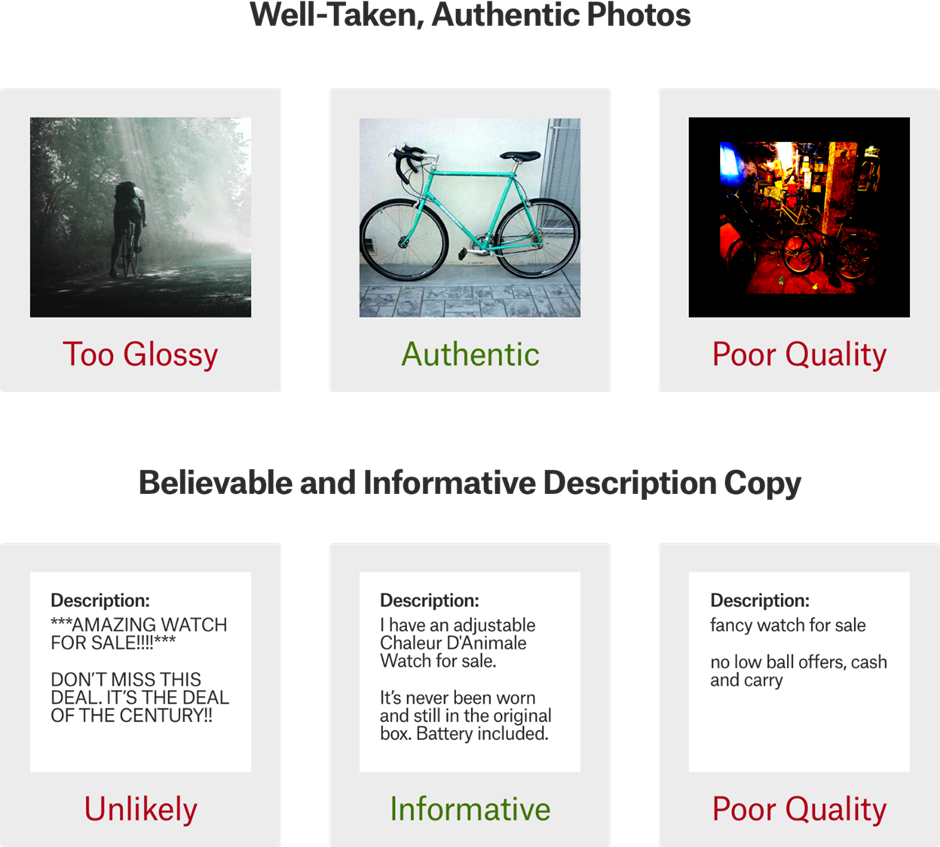

And, even with an optimized product listing, demand for a product may simply not exist–frustrating sellers who may have over-invested in marketing.

### 1.2. Dataset Overview

Data is provided by Avito as a open source through Kaggle competition. Total size of files provided are 146.76 GB.

Target Variable: Deal Probability
Intuitively, a deal should be either Sold or Not Sold. But it’s not! We see numbers between 0 and 1. So, we are actually predicting Avito’s model. We have discussed this in later sections.


### 1.3. Real-world/Business Objective and Constraints

This model will help the stack-holder/ad publisher to clearly post the ad to maximize the probability of successful deal. With the score publisher can know what part of their ad is wrong among price, geographic location, description, image, etc.

Latency constraint: Normal to Very Slow

Performance metric: Lowest as possible

### 1.4. Evaluation Metrics

Root Mean Squared Error (RMSE)
Submissions are scored on the root mean squared error. RMSE is defined as:

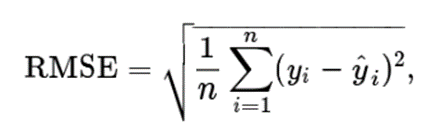

where y hat is the predicted value and y is the original value.


## 2. Dataset Details 

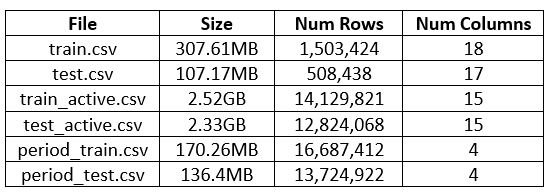

<b>train.csv and test.csv</b> – Primary data<br>
&emsp; Information Provided:<br>
&emsp; &emsp; o	item_id - Ad id.<br>
&emsp; &emsp; o	user_id - User id.<br>
&emsp; &emsp; o	region - Ad region.<br>
&emsp; &emsp; o	city - Ad city.<br>
&emsp; &emsp; o	parent_category_name - Top level ad category as classified by Avito's ad model.<br>
&emsp; &emsp; o	category_name - Fine grain ad category as classified by Avito's ad model.<br>
&emsp; &emsp; o	param_1 - Optional parameter from Avito's ad model.<br>
&emsp; &emsp; o	param_2 - Optional parameter from Avito's ad model.<br>
&emsp; &emsp; o	param_3 - Optional parameter from Avito's ad model.<br>
&emsp; &emsp; o	title - Ad title.<br>
&emsp; &emsp; o	description - Ad description.<br>
&emsp; &emsp; o	price - Ad price.<br>
&emsp; &emsp; o	item_seq_number - Ad sequential number for user.<br>
&emsp; &emsp; o	activation_date- Date ad was placed.<br>
&emsp; &emsp; o	user_type - User type.<br>
&emsp; &emsp; o	image - Id code of image. Ties to a jpg file in train_jpg. Not every ad has an image.<br>
&emsp; &emsp; o	image_top_1 - Avito's classification code for the image.<br>
&emsp; &emsp; o	deal_probability - The target variable. This is the likelihood that an ad actually sold something. It's not possible to verify every transaction with certainty, so this column's value can be any float from zero to one.<br><br>

<b>test.csv</b> - Test data. Same schema as the train data, minus deal_probability.<br><br>

<b>train_active.csv</b> - Supplemental data from ads that were displayed during the same period as train.csv. Same schema as the train data minus deal_probability, image, and image_top_1.<br><br>

<b>test_active.csv</b> - Supplemental data from ads that were displayed during the same period as test.csv. Same schema as the train data minus deal_probability, image, and image_top_1.<br><br>

<b>periods_train.csv</b> - Supplemental data showing the dates when the ads from train_active.csv were activated and when they where displayed.<br>
&emsp; &emsp; o	item_id - Ad id. Maps to an id in train_active.csv. IDs may show up multiple times in this file if the ad was renewed.<br>
&emsp; &emsp; o	activation_date - Date the ad was placed.<br>
&emsp; &emsp; o	date_from - First day the ad was displayed.<br>
&emsp; &emsp; o	date_to - Last day the ad was displayed.<br>

<b>periods_test.csv</b> - Supplemental data showing the dates when the ads from test_active.csv were activated and when they were displayed. Same schema as periods_train.csv, except that the item ids map to an ad in test_active.csv.<br><br>

<b>train_jpg.zip</b> - Images from the ads in train.csv.<br><br>

<b>test_jpg.zip</b> - Images from the ads in test.csv.<br><br>


## 3. Eploratory Data Analysis

In [1]:
import os
import pickle
import re

import cv2
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import (ImageDataGenerator,
                                                  img_to_array, load_img)
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tqdm import tqdm
from wordcloud import WordCloud

from dask.diagnostics import ProgressBar
ProgressBar().register()

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('./avito-demand-prediction/train.csv', parse_dates=["activation_date"])
test_df = pd.read_csv('./avito-demand-prediction/test.csv', parse_dates=["activation_date"])

X = train_df.drop(columns=['deal_probability'])
y = train_df['deal_probability']
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.20, random_state=42)

print("Train rows and columns are : ", X_train.shape)
print("CV rows and columns are : ", X_cv.shape)
print("="*50)
print("Train Labels rows and columns are : ", y_train.shape)
print("CV Labels rows and columns are : ", y_cv.shape)
print("="*50)
print("Test rows and columns are : ", test_df.shape)

Train rows and columns are :  (1202739, 17)
CV rows and columns are :  (300685, 17)
Train Labels rows and columns are :  (1202739,)
CV Labels rows and columns are :  (300685,)
Test rows and columns are :  (508438, 17)


In [9]:
X_train.head(1)

item_id       user_id          region  city  \
1501077  771fda0ff8ff  969f1c4acd66  Омская область  Омск   

        parent_category_name          category_name param_1 param_2 param_3  \
1501077  Бытовая электроника  Настольные компьютеры     NaN     NaN     NaN   

                    title                    description  price  \
1501077  Продам системник  продам системник на запчасти.   50.0   

         item_seq_number activation_date user_type  \
1501077               18      2017-03-28   Private   

                                                     image  image_top_1  
1501077  5f1a4dc40d333d5cd20c9831553a61053e83ffb156f692...       2789.0

In [10]:
X_cv.head(1)

item_id       user_id             region        city  \
143309  bd45a493569d  6be13830198e  Красноярский край  Красноярск   

       parent_category_name              category_name     param_1 param_2  \
143309          Личные вещи  Одежда, обувь, аксессуары  Аксессуары     NaN   

       param_3                      title  \
143309     NaN  Сумка бренд Louis Vuitton   

                                              description    price  \
143309  Сумка коллекционная, в хорошем состоянии! Нату...  50000.0   

        item_seq_number activation_date user_type  \
143309               99      2017-03-19   Private   

                                                    image  image_top_1  
143309  3e6502f1657e3f256be696fd82feb455ddc82345e3577e...        256.0

In [11]:
test_df.head(1)

item_id       user_id                 region       city  \
0  6544e41a8817  dbe73ad6e4b5  Волгоградская область  Волгоград   

  parent_category_name           category_name        param_1 param_2 param_3  \
0          Личные вещи  Детская одежда и обувь  Для мальчиков   Обувь      25   

             title   description  price  item_seq_number activation_date  \
0  Отдам бесплатно  На ангарском    NaN               66      2017-04-18   

  user_type                                              image  image_top_1  
0   Private  a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...       2020.0

### 3.1. Checking for Null Values

In [12]:
# train_df.info()
train_df_null = pd.DataFrame({
                             'Null Values' : train_df.isnull().sum(axis = 0),
                             '% Null Values' : train_df.isnull().sum(axis = 0) / train_df.shape[0]
                             })
train_df_null = train_df_null[train_df_null['Null Values'] > 0]

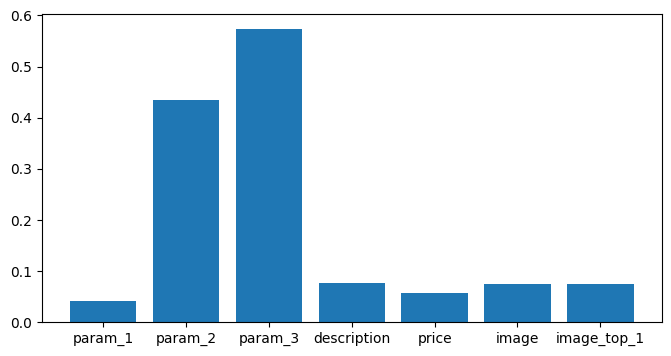

In [13]:
fig = plt.figure(figsize =(8, 4)) # Figure Size
plt.bar(train_df_null.index, train_df_null['% Null Values']) # Horizontal Bar Plot
plt.show() # Show Plot

In [14]:
# test_df.info()
test_df_null = pd.DataFrame({
                             'Null Values' : test_df.isnull().sum(axis = 0),
                             '% Null Values' : test_df.isnull().sum(axis = 0) / test_df.shape[0]
                             })
test_df_null = test_df_null[test_df_null['Null Values'] > 0]

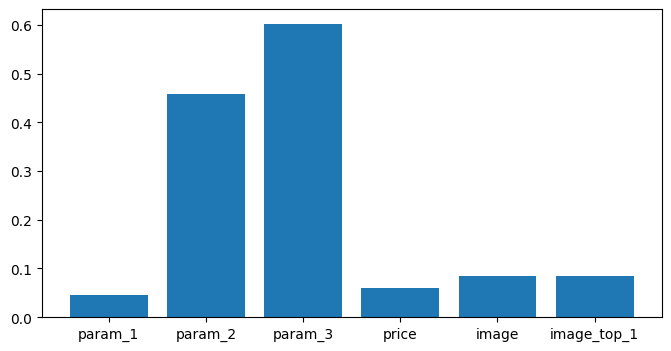

In [15]:
fig = plt.figure(figsize =(8, 4)) # Figure Size
plt.bar(test_df_null.index, test_df_null['% Null Values']) # Horizontal Bar Plot
plt.show() # Show Plot

Quick Observation:

1. Small percent of null values are observed in param_1, description, price, image, image_top_1.<br> 
However, no null values are found in description of test data.
2. Large percent of null values are observed in param_2, param_3.

### 3.2. Target Variable : deal_probability

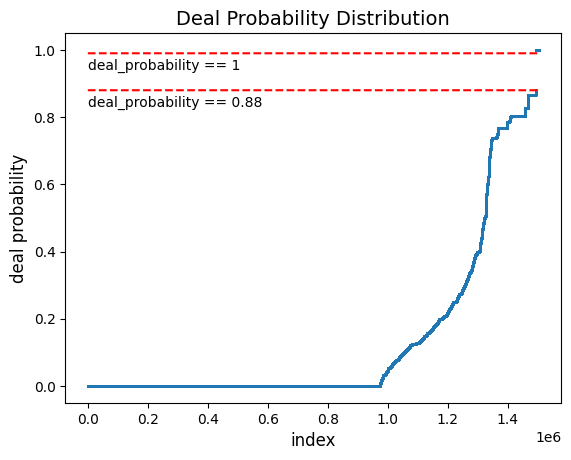

In [16]:
train_df['count'] = 1
deal_prob_df = train_df.groupby(by=['deal_probability']).agg({'count':'sum'}).reset_index()
deal_prob_df['count_cum'] = deal_prob_df['count'].cumsum()
deal_prob_df['% count_cum'] = deal_prob_df['count_cum'] / train_df.shape[0]

plt.scatter(range(train_df.shape[0]), np.sort(train_df['deal_probability'].values), s=0.1)

x = np.arange(train_df.shape[0])
plt.plot(x, x*0+.88, linestyle='--', color='red')
plt.plot(x, x*0+.99, linestyle='--', color='red')

plt.text(1, .83, 'deal_probability == 0.88')#text
plt.text(1, .94, 'deal_probability == 1')#text

plt.xlabel('index', fontsize=12)
plt.ylabel('deal probability', fontsize=12)
plt.title("Deal Probability Distribution", fontsize=14)
plt.show()

In [17]:
deal_prob_df.head()

deal_probability   count  count_cum  % count_cum
0           0.00000  974618     974618     0.648266
1           0.00238       1     974619     0.648266
2           0.00242      15     974634     0.648276
3           0.00256      30     974664     0.648296
4           0.00267       3     974667     0.648298

Quick Observation

1. 64% of data points have deal_probability are 0. Signifying No deals weres made for most of the ad posted.
2. There are no data points with deal_probability between 0.88059 and 1.

### 3.3. Categorical Features

#### 3.3.1. item_id and user_id

In [18]:
train_df['item_id'].nunique()

1503424

In [19]:
train_df[['user_id']].merge(test_df[['user_id']], how='inner', on=['user_id']).nunique()

user_id    67929
dtype: int64

Quick Observation

1. Cardinality of column item_id is very high. So we will not be using this in our model.
2. Cardinality of column user_id is also very high. Cannot use directly in the model. We can extact features answers question below.
3. 67929 user are common in train and test data.

https://www.kaggle.com/competitions/avito-demand-prediction/discussion/56117

1. How many items has this user posted?
2. How frequently does this user post?
3. How long has it been since this user last posted?

In [20]:
if not os.path.exists('train_user_id_df.csv'):
    def user_post_freq(series):
        series = series.sort_values().values
        if len(series) == 1:
            return 0
        # 1 day = 8.64e+13
        return int((series[-1]-series[0])/8.64e+13) / len(series)   

    train_df['user_total_posts'] = 1 
    train_df['user_post_freq'] = train_df['activation_date']

    train_user_id_df = train_df.groupby(by='user_id').agg({
                                                    'user_total_posts':'sum',
                                                    'user_post_freq': user_post_freq,
                                                    }).reset_index()

    train_user_id_df.to_csv('train_user_id_df.csv', index=False)

else:
    train_user_id_df = pd.read_csv('train_user_id_df.csv')

In [21]:
train_user_id_df.head()

user_id  user_total_posts  user_post_freq
0  0000312c4672                 1            0.00
1  0000326c6042                 2            0.00
2  000041bbfe14                 1            0.00
3  00007ac91e3b                 1            0.00
4  0000ae7a109b                 4            1.25

#### 3.3.2. region and city

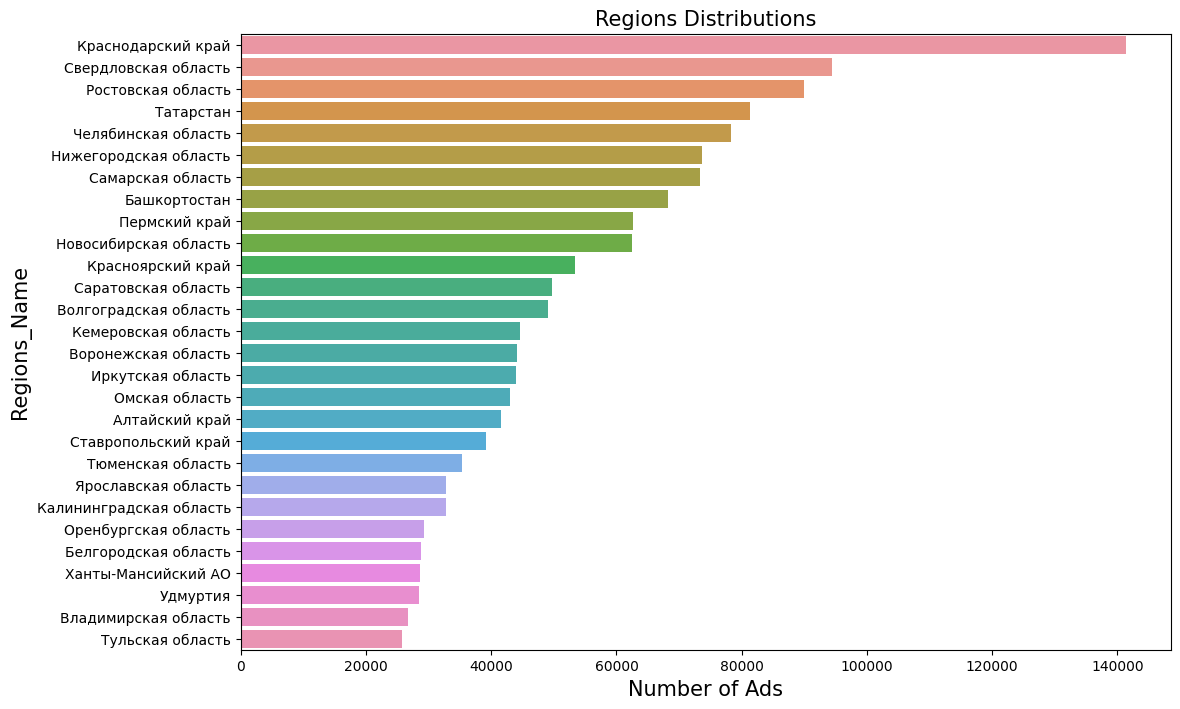

In [22]:
# Let see how the probablities are distributed with Deal_Probablity on a Histogram plot
plt.figure(figsize=(12,8))
regions =  train_df["region"].value_counts().index
sns.barplot(x=train_df["region"].value_counts(), y=regions, data=train_df)
plt.xlabel('Number of Ads', fontsize=15)
plt.ylabel('Regions_Name', fontsize=15)
plt.title("Regions Distributions", fontsize=15)
plt.show()

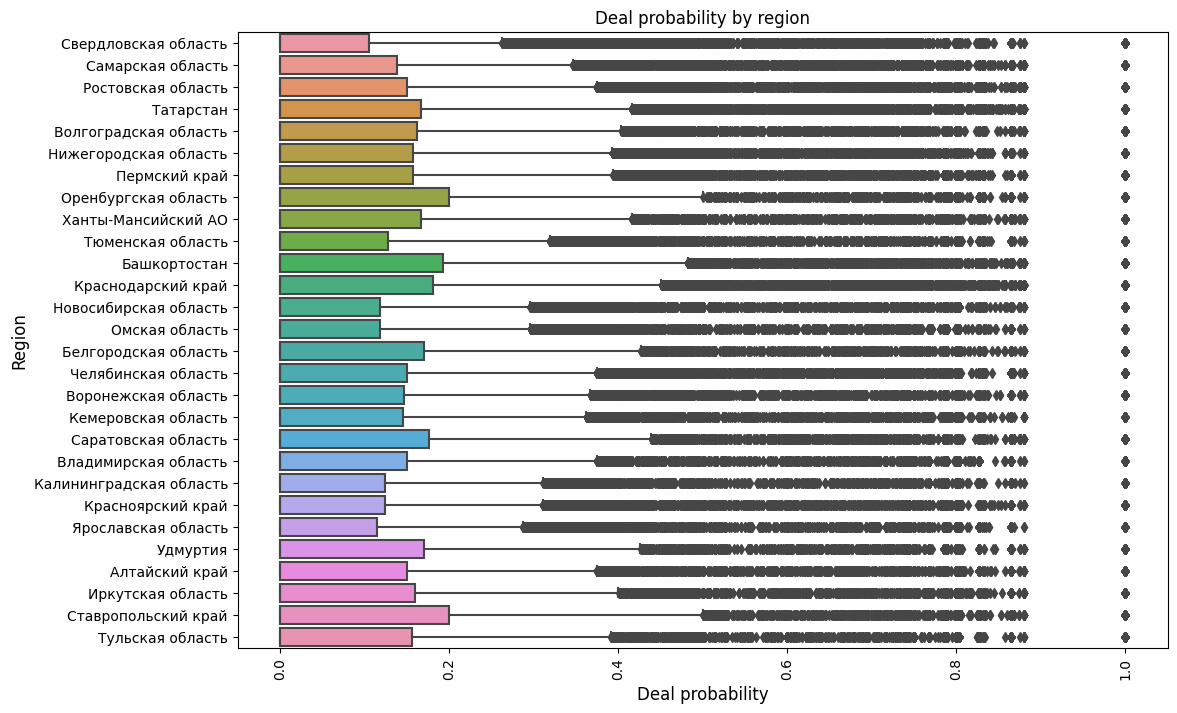

In [23]:
# Let see with Region wise distribution of Ads
plt.figure(figsize=(12,8))
sns.boxplot(y=train_df["region"], x=train_df["deal_probability"], data=train_df)
plt.xlabel('Deal probability', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.title("Deal probability by region")
plt.xticks(rotation='vertical')
plt.show()

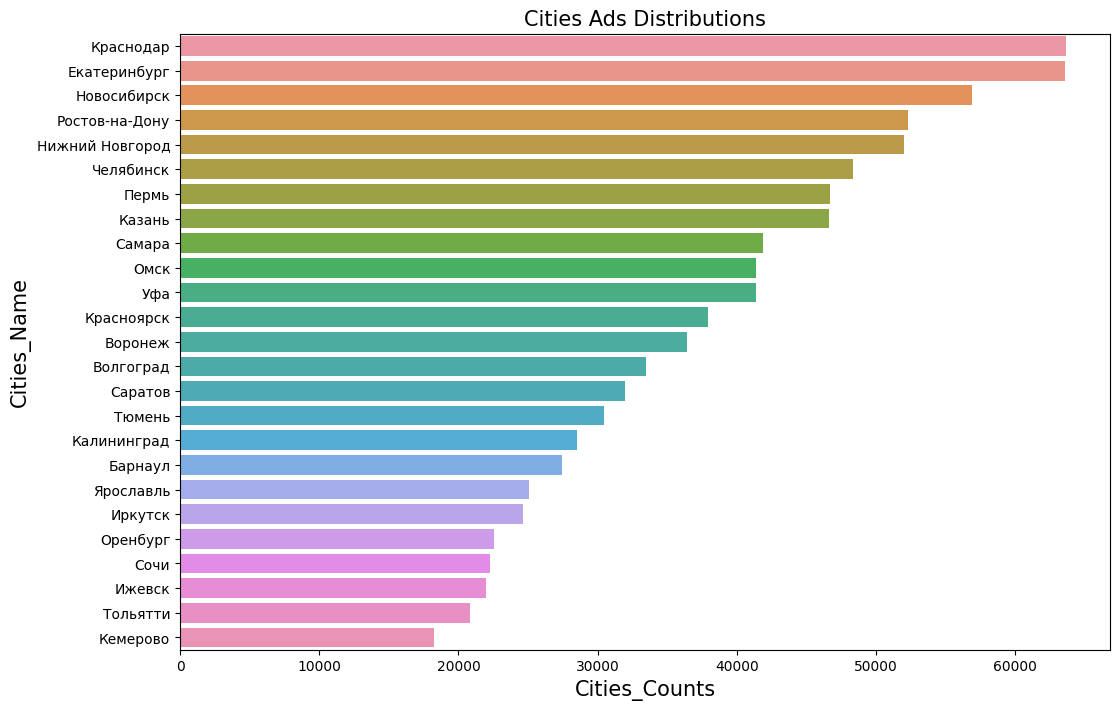

In [24]:
# Let see how th ads are distrubuted with respect to city 
plt.figure(figsize=(12,8))
cities =  train_df["city"].value_counts()[:25].index
sns.barplot(x=train_df["city"].value_counts()[:25], y=cities, data=train_df)
plt.xlabel('Cities_Counts', fontsize=15)
plt.ylabel('Cities_Name', fontsize=15)
plt.title("Cities Ads Distributions", fontsize=15)
plt.show()

#### 3.3.3. parent_category_name & category_name

In [25]:
category_train_df = train_df.groupby(by=['parent_category_name', 'category_name']).agg({'count': 'sum'}).reset_index()

In [26]:
# fig = plt.figure(figsize =(20, 10)) 
fig = px.sunburst(category_train_df, path=['parent_category_name', 
                            'category_name'], 
                  values='count',
                  width=800, height=800,
                  title="parent_category_name and category_name over number of datapoints")

fig.show()

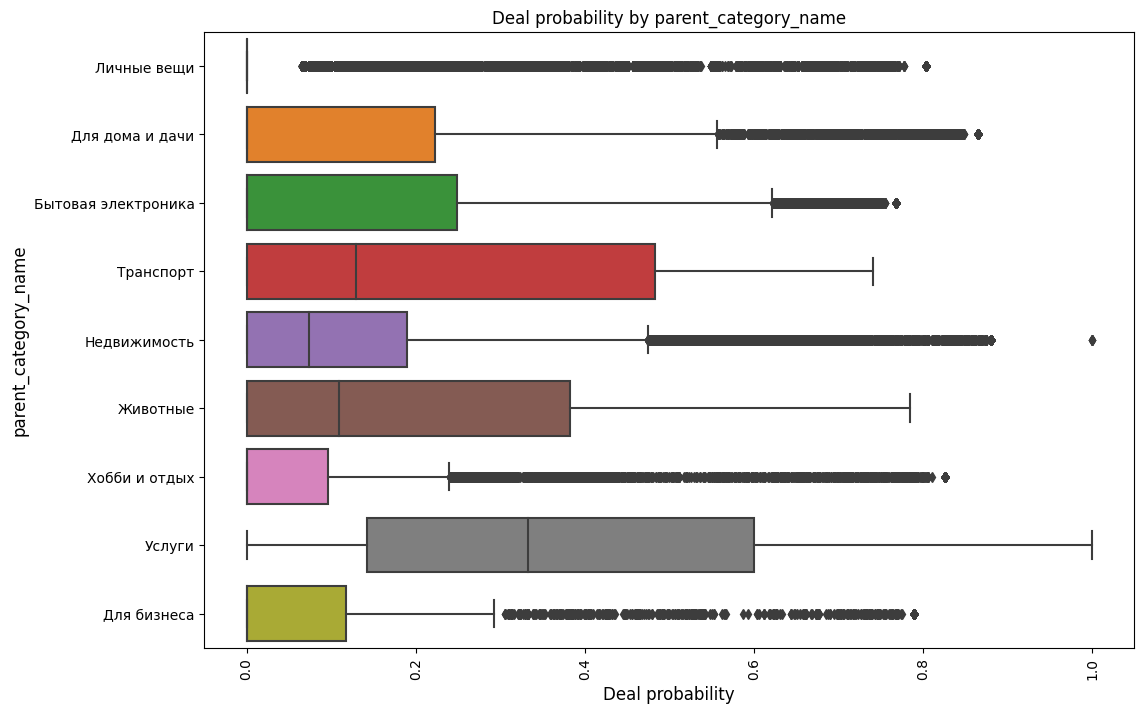

In [27]:
# Parent Category wise Ads Distribution

# Let see how the deal probablity are distributed with respect to the parent category name
plt.figure(figsize=(12,8))
sns.boxplot(y=train_df["parent_category_name"], x=train_df["deal_probability"], data=train_df)
plt.xlabel('Deal probability', fontsize=12)
plt.ylabel('parent_category_name', fontsize=12)
plt.title("Deal probability by parent_category_name")
plt.xticks(rotation='vertical')
plt.show()

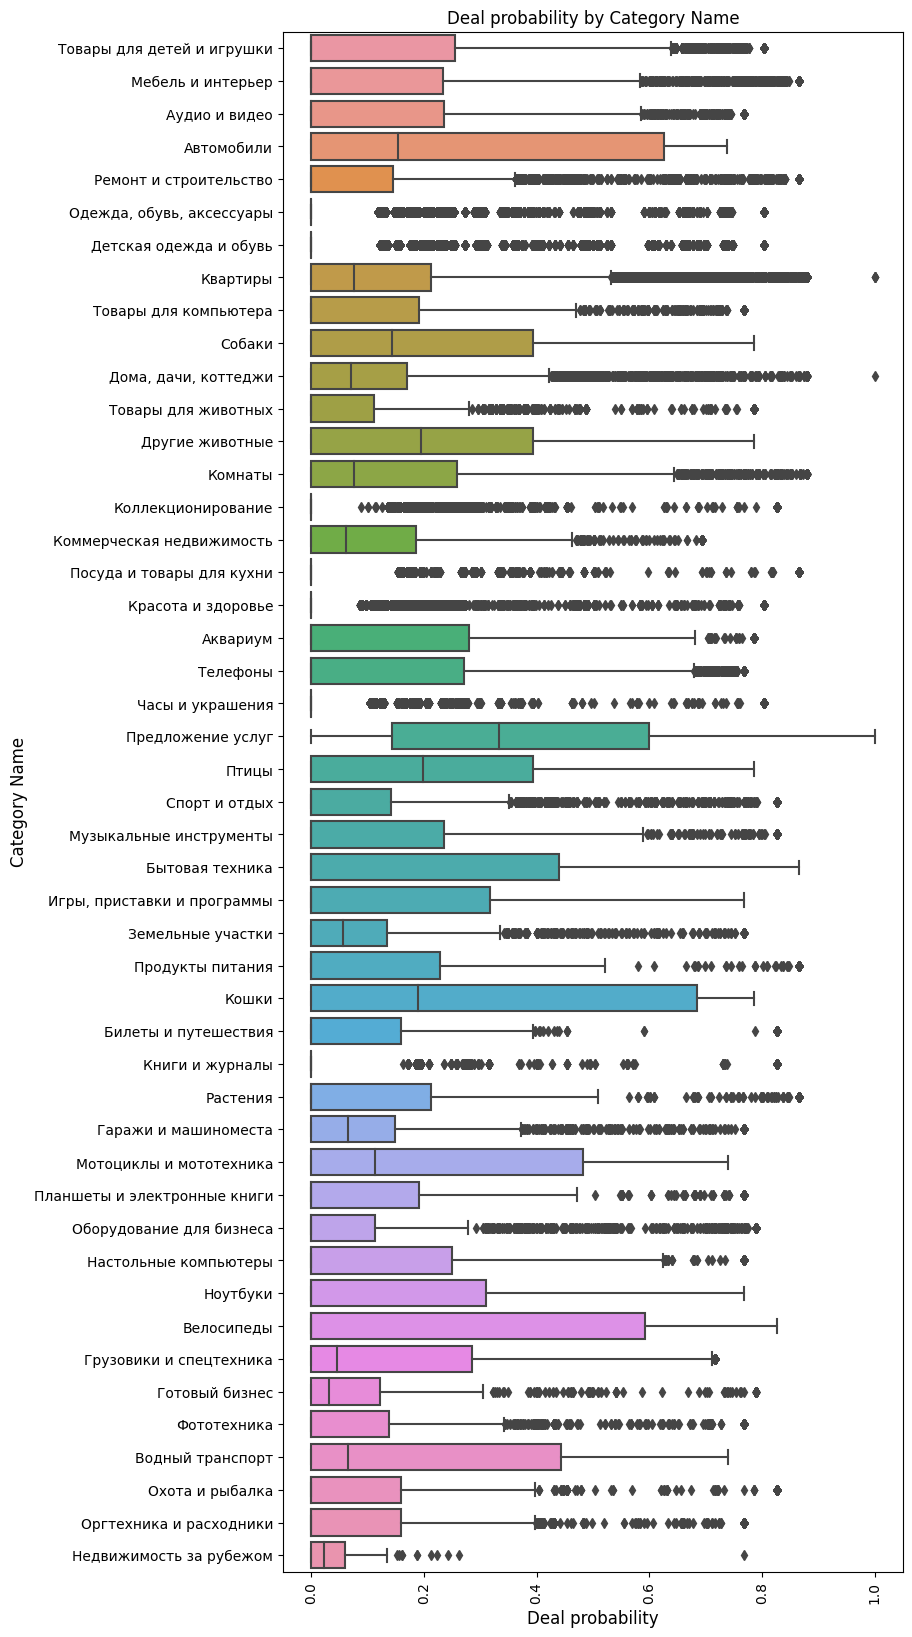

In [28]:
# Deal Probablity distribution according to the category name
# Let see how the deal probablity are distributed with respect to the category name
plt.figure(figsize=(8,20))
sns.boxplot(y=train_df["category_name"], x=train_df["deal_probability"], data=train_df)
plt.xlabel('Deal probability', fontsize=12)
plt.ylabel('Category Name', fontsize=12)
plt.title("Deal probability by Category Name")
plt.xticks(rotation='vertical')
plt.show()

#### 3.3.4. user_type

In [29]:
print("'user_type' percent of value in each of type(Private/Company/Shop) as follows:")
train_df['user_type'].value_counts() / train_df.shape[0]

'user_type' percent of value in each of type(Private/Company/Shop) as follows:


Private    0.715504
Company    0.230972
Shop       0.053524
Name: user_type, dtype: float64

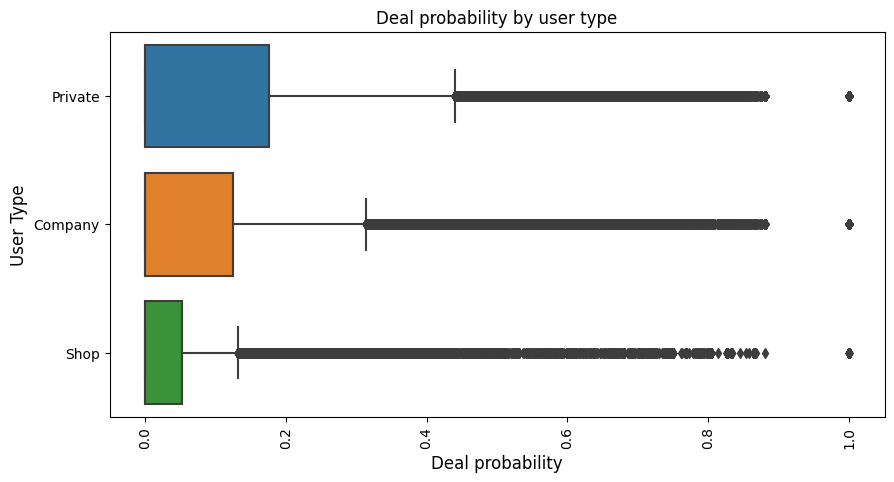

In [30]:
# Deal Probablity Distributions by User type
# Let see how the deal probablity are distributed with respect to the User Type
plt.figure(figsize=(10,5))
sns.boxplot(y=train_df["user_type"], x=train_df["deal_probability"], data=train_df)
plt.xlabel('Deal probability', fontsize=12)
plt.ylabel('User Type', fontsize=12)
plt.title("Deal probability by user type")
plt.xticks(rotation='vertical')
plt.show()

Quick Observation:

1. Majority of ads 71.55% posted by 'Private' users. Different 'Company' have posted 23.09% of ads. While Small percentage of users are Shop with 5.32%.

### 3.4. Numerical Features

#### 3.4.1. price

Some categories have higher average than other category.<br>
Problem: Example - Average price of cars may act as a bias for average price of pens, so if wants to normalize the values of price columns. Very high price items like propery or vehicles may make normalized value of book as zero.<br>
Solution: We will be handle data points belonging to each category differently.<br>

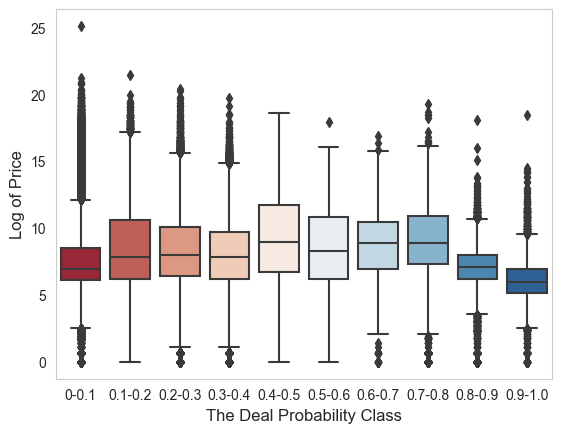

In [31]:
# bins of deal probability
interval = (-0.99, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1.1)
cats = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9','0.9-1.0']
train_df['deal_class'] = train_df['deal_probability'].apply(lambda x: ">=0.5" if x >=0.5 else "<0.5")
train_df["deal_class_2"] = pd.cut(train_df.deal_probability, interval, labels=cats)

train_df['price_log'] = np.log(train_df['price'] + 1)
sns.set_style("whitegrid", {'axes.grid' : False})
g = sns.boxplot(x='deal_class_2', y='price_log', data=train_df, palette="RdBu")
g.set_xlabel('The Deal Probability Class',fontsize=12)
g.set_ylabel('Log of Price',fontsize=12)
plt.show()

Quick Observation:
1. Items having Low deal probabilities have lower log price while its slightly higher for items having deal probability about 0.5

#### 3.4.2. item_seq_number

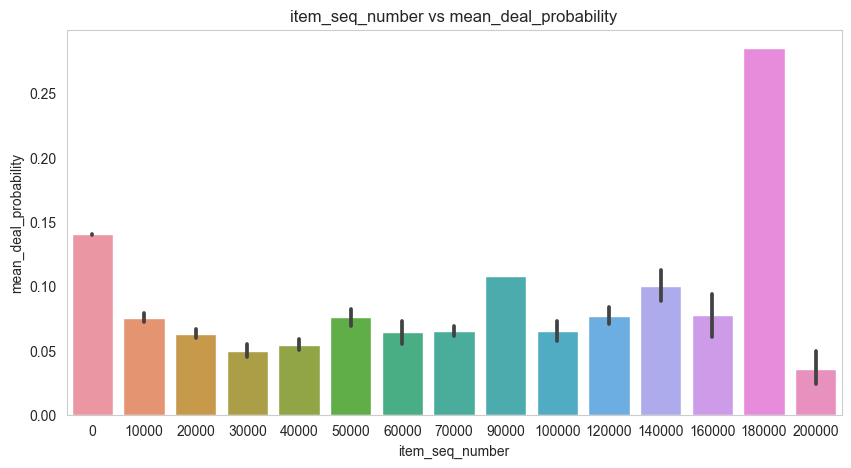

In [32]:
df = train_df.copy()
df["item_seq_number"] = df['item_seq_number'].astype('int') // 10000 * 10000
plt.figure(figsize = (10, 5))
sns.barplot(x = 'item_seq_number', y = 'deal_probability', data=df)
plt.ylabel('mean_deal_probability')
plt.xlabel('item_seq_number')
plt.title('item_seq_number vs mean_deal_probability')
plt.show()

#### 3.4.3. image_top_1

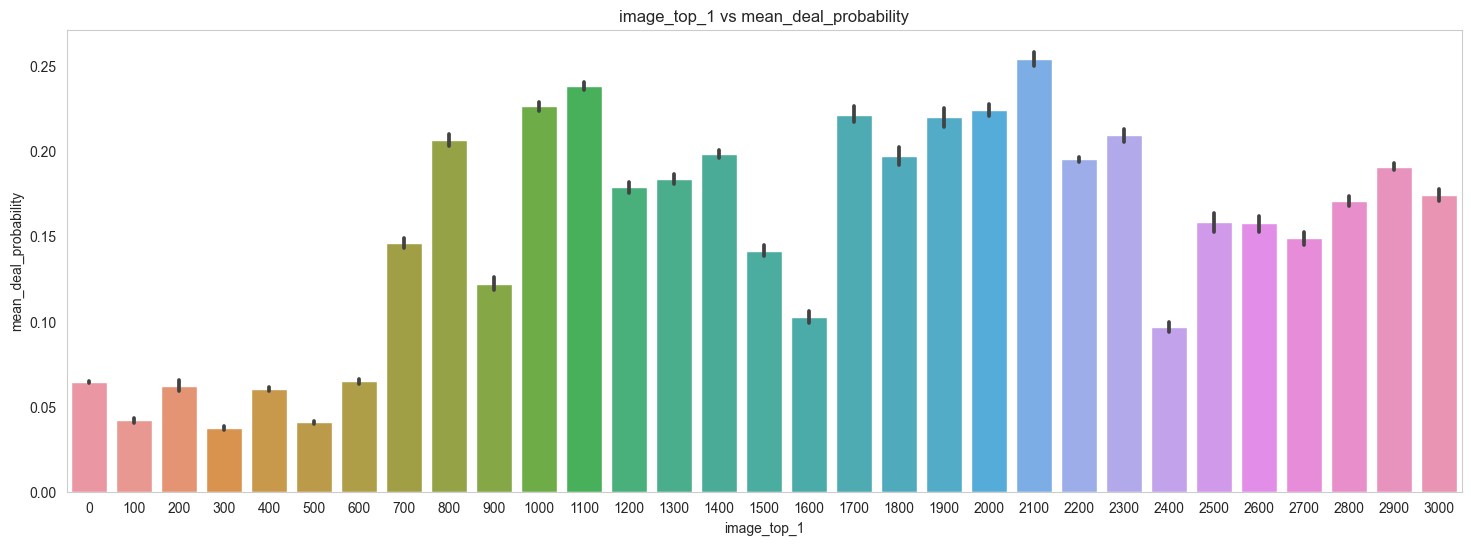

In [33]:
df = train_df.dropna(subset=['image_top_1']).copy()
df["image_top_1"] = df['image_top_1'].astype('int') // 100 * 100
plt.figure(figsize = (18, 6))
sns.barplot(x = 'image_top_1', y = 'deal_probability', data=df)
plt.ylabel('mean_deal_probability')
plt.xlabel('image_top_1')
plt.title('image_top_1 vs mean_deal_probability')
plt.show()

Quick observation:
1. All the numeric features have wide spectrum of values over category.


### 3.5. Text Features

#### 3.5.1. title

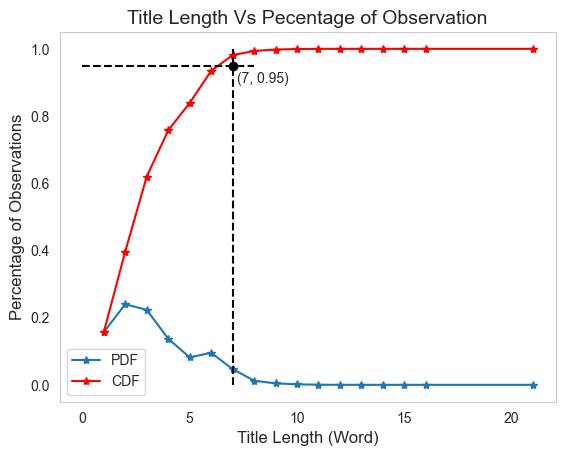

In [34]:
train_title_df_count = pd.DataFrame({'title_length':train_df['title'].apply(lambda x:len(x.split())), 'count': 1})
train_title_df_count = train_title_df_count.groupby(by=['title_length']).agg({'count':'sum'}).reset_index()
train_title_df_count['cdf'] = train_title_df_count['count'] / train_df.shape[0]
train_title_df_count['pdf'] = train_title_df_count['count'].cumsum() / train_df.shape[0]
train_title_df_count = train_title_df_count[['title_length','cdf','pdf']]

plt.plot(train_title_df_count['title_length'].values, train_title_df_count['cdf'].values, marker='*', label='PDF')
plt.plot(train_title_df_count['title_length'].values, train_title_df_count['pdf'].values, marker='*', color='red', label='CDF')

x = np.arange(9)
y = np.arange(2)
plt.plot(y*0+7, y, linestyle='--', color = 'black')
plt.plot(x, x*0+.95, linestyle='--', color='black')
plt.plot(7, 0.95, marker = 'o', color = 'black')

plt.text(7.2, .9, '(7, 0.95)')#text

plt.xlabel('Title Length (Word)', fontsize=12)
plt.ylabel('Percentage of Observations', fontsize=12)
plt.title("Title Length Vs Pecentage of Observation", fontsize=14)
plt.legend()
plt.show()

In [35]:
stopWords = set(stopwords.words('russian'))

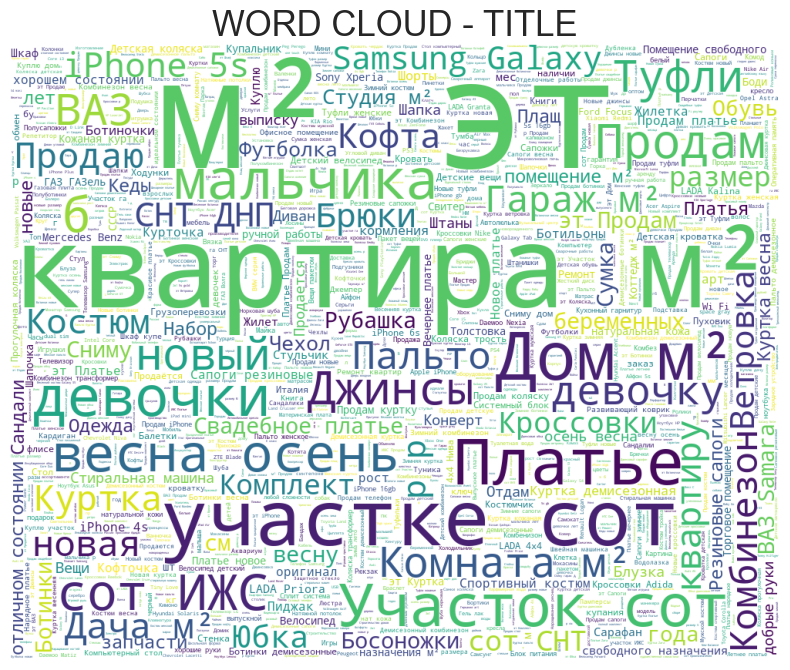

In [36]:
# Word Cloud

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopWords,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=800,
                          random_state=42,
                         ).generate(" ".join(train_df['title'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (10,8))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLE",fontsize=25)
plt.axis('off')
plt.show()

#### 3.5.2. description

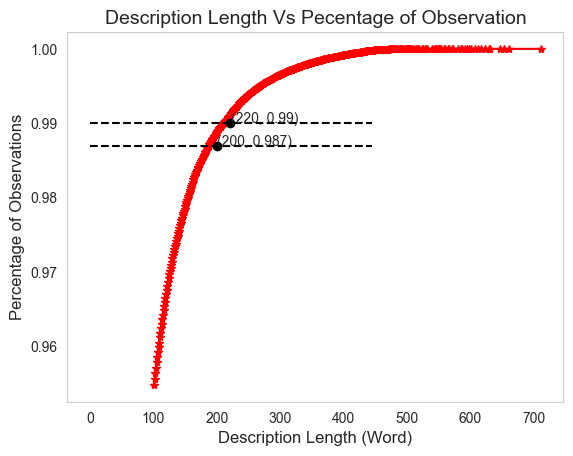

In [37]:
train_description_df_count = pd.DataFrame({'description_length':train_df['description'].apply(lambda x:len(str(x).split())), 'count': 1})
train_description_df_count = train_description_df_count.groupby(by=['description_length']).agg({'count':'sum'}).reset_index()
train_description_df_count['cdf'] = train_description_df_count['count'] / train_df.shape[0]
train_description_df_count['pdf'] = train_description_df_count['count'].cumsum() / train_df.shape[0]
train_description_df_count = train_description_df_count[['description_length','cdf','pdf']]
train_description_df_count = train_description_df_count[100:]

# plt.plot(train_description_df_count['description_length'].values, train_description_df_count['cdf'].values, marker='*')
plt.plot(train_description_df_count['description_length'].values, train_description_df_count['pdf'].values, marker='*', color='red')

x1 = np.arange(train_description_df_count.shape[0])
x2 = np.arange(train_description_df_count.shape[0])

plt.plot(x1, x1*0+.99, linestyle='--', color = 'black')
plt.plot(x2, x2*0+0.987, linestyle='--', color='black')

plt.plot(220, 0.99, marker = 'o', color = 'black')
plt.plot(200, 0.987, marker = 'o', color = 'black')

plt.text(222.2, .99, '(220, 0.99)')#text
plt.text(200.2, .987, '(200, 0.987)')#text

plt.xlabel('Description Length (Word)', fontsize=12)
plt.ylabel('Percentage of Observations', fontsize=12)
plt.title("Description Length Vs Pecentage of Observation", fontsize=14)
plt.show()

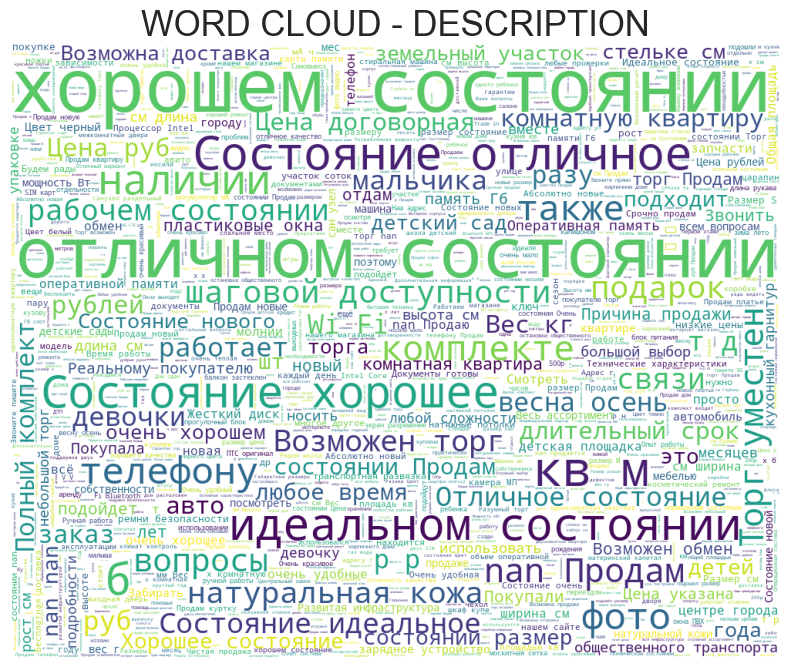

In [38]:
# Word Cloud

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopWords,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=800,
                          random_state=42,
                         ).generate(" ".join(train_df['description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (10,8))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

### 3.6. Image 

In [39]:
count = 0
for root_dir, cur_dir, files in os.walk('./avito-demand-prediction/train_jpg/avito-demand-prediction'):
    count += len(files)
    
print('file count:', count)    
print('file count present percent:', count/train_df.shape[0])

file count: 1390836
file count present percent: 0.9251122770422715


In [40]:
count = 0
for root_dir, cur_dir, files in os.walk('./avito-demand-prediction/test_jpg'):
    count += len(files)
    
print('file count:', count)    
print('file count present percent:', count/test_df.shape[0])

file count: 465829
file count present percent: 0.916196271718479


Quick Observation:
1. total number of file exists in the train directory are 1390836 which is 0.925%.
2. total number of file exists in the test directory are 465829 which is 0.916%.

In [41]:
# Common data in train and test image
train_df[['image']].dropna().merge(test_df[['image']].dropna(), on=['image'], how='inner').nunique()

image    0
dtype: int64

### Observation


1. Approx 88 % training data having less than 0.5 deal probabilty. Remaining 12 % having probability more than or equal to 0.5.
2. Top 5 Ad titles are : <br>
    Платье(Dress) <br>
    Туфли (Shoes) <br>
    Куртка(Jacket) <br>
    Пальто (Coat) <br>
    Джинсы(Jeans) <br>
3. Top 5 Ad cities :
    Краснодар (Krasnodar) <br>
    Екатеринбург (Yekaterinburg) <br>
    Новосибирск (Novosibirsk) <br>
    Ростов-на-Дону (Rostov-on-don) <br>
    Нижний Новгород (Nizhny Novgorod) <br>
3. Top 5 Ad regions :
    Krasnodar Krai <br>
    Sverdlovsk oblast <br>
    Rostov oblast <br>
    Tatarstan <br>
    Chelyabinsk oblast <br>
4. Top 5 Fine grain ad category as classified by Avito's ad mode :
    Clothing, shoes and accessories <br>
    Children clothing and shoes <br>
    Childrens product and toys <br>
    Apartments <br>
    Phones <br>
5. Top 5 Top level ad category as classified by Avito's ad model :
    Personal belongings - 46 % <br>
    For the home and garden - 12 % <br>
    Consumer electronics - 12 % <br>
    Real estate - 10 % <br>
    Hobbies & leisure - 6 % <br>
6. Distribution of user types :
    Private users constitutes 71.6 % data <br>
    Comapny users constitutes 23.1 % data <br>
    Shop users constitutes 5.35 % data <br>
7. More Observation can be found in individual section.


## 4. Feature Engineering

We will consider image_top_1 as both categorical and numerical, because in the kaggle competition some teams have used this features as categorical feature and some as numerical feature.

In [42]:
X_train['image_top_1_C'] = X_train['image_top_1']
X_train['image_top_1_N'] = X_train['image_top_1']

### 4.1. Fill Missing Values 

As we have discussed in subsection 3.1. train data has null values in param_1, param_2, param_3, description, price, image and image_top_1(image_top_1_C & image_top_1_N).

#### 4.1.1. Categorical and Text Features

Categorical and Text feature replace with 'null' string rather than empty string which can be treated as new category. 

In [43]:
# categorical and text 
X_train['param_1'] = X_train['param_1'].fillna('null')
X_train['param_2'] = X_train['param_2'].fillna('null')
X_train['param_3'] = X_train['param_3'].fillna('null')
X_train['description'] = X_train['description'].fillna('null')
X_train['image_top_1_C'] = X_train['image_top_1_C'].astype(str).fillna('null')

#### 4.1.2. Numerical Features

Price and image_top_1_N have missing values so rather than mean of all the ad's we followed the approch of filling them with category_name mean.

In [44]:
##### price #####
if not os.path.exists('./bin/price_category_name_mean.csv'):
    price_average_df = X_train.groupby(by=['category_name']).agg({'price':'mean'}).reset_index()
    price_average_df.to_csv('./bin/price_category_name_mean.csv', index=False)

price_average_df = pd.read_csv('./bin/price_category_name_mean.csv')

def fill_missing_price(df, price_average_df):
    df = df.merge(price_average_df, on='category_name', how='left').reset_index(drop=True)
    df.loc[df[df['price_x'].isnull() == True].index, 'price_x'] = df[df['price_x'].isnull() == True]['price_y']
    df = df.drop(columns=['price_y'])
    df.rename(columns = {'price_x':'price'}, inplace = True)
    return df
    

In [45]:
X_train = fill_missing_price(X_train, price_average_df)

In [46]:
##### image_top_1_N #####
if not os.path.exists('./bin/image_top_1_N_category_name_mean.csv'):
    image_top_1_average_df = X_train.groupby(by=['category_name']).agg({'image_top_1_N':'mean'}).reset_index()
    image_top_1_average_df.to_csv('./bin/image_top_1_N_category_name_mean.csv', index=False)

image_top_1_average_df = pd.read_csv('./bin/image_top_1_N_category_name_mean.csv')

def fill_missing_image_top_1(df, image_top_1_average_df):
    df = df.merge(image_top_1_average_df, on='category_name', how='left').reset_index(drop=True)
    df.loc[df[df['image_top_1_N_x'].isnull() == True].index, 'image_top_1_N_x'] = df[df['image_top_1_N_x'].isnull() == True]['image_top_1_N_y']
    df = df.drop(columns=['image_top_1_N_y'])
    df.rename(columns = {'image_top_1_N_x':'image_top_1_N'}, inplace = True)
    return df


In [47]:
X_train = fill_missing_image_top_1(X_train, image_top_1_average_df)

#### 4.1.3. Image Feature

We have replaced the not available with default images or the dummy image.

In [48]:
train_df_image_path = os.path.join('avito-demand-prediction','train_jpg')
test_df_image_path = os.path.join('avito-demand-prediction','test_jpg','data','competition_files','test_jpg')

In [49]:
def fill_missing_imagepath(x, main_path):
    # missing images are filled with default_image.jpg
    if x!=x:  
        return str(os.path.join(main_path, 'default_image.jpg'))
    return os.path.join(main_path, 'avito-demand-prediction', str(x)+'.jpg')


In [50]:
X_train['image_fullpath'] = X_train['image'].apply(fill_missing_imagepath, main_path = train_df_image_path)

### 4.2. Interactive Features 

We have curated new 5 new categorical features using multiple features.

In [51]:
X_train['region__city'] = X_train['region'] + X_train['city']
X_train['param_1__param_2__param_3'] = X_train['param_1'] + X_train['param_2'] + X_train['param_3']
X_train['parent_category_name__user_type'] = X_train['parent_category_name'] + X_train['user_type']
X_train['category_name__user_type'] = X_train['category_name'] + X_train['user_type']
X_train['region__user_type'] = X_train['region'] + X_train['user_type']

### 4.3 More Features

Based on the Text features we create new numerical features.

In [52]:
# calling the text_featuring function which extract features from the title and description.
X_train["title_words_length"] = X_train["title"].apply(lambda x: len(x.split()))
X_train["description_words_length"] = X_train["description"].apply(lambda x: len(x.split()))
    
X_train['symbol1_count'] = X_train['description'].str.count('↓')
X_train['symbol2_count'] = X_train['description'].str.count('\*')
X_train['symbol3_count'] = X_train['description'].str.count('✔')
X_train['symbol4_count'] = X_train['description'].str.count('❀')
X_train['symbol5_count'] = X_train['description'].str.count('➚')
X_train['symbol6_count'] = X_train['description'].str.count('ஜ')
X_train['symbol7_count'] = X_train['description'].str.count('.')
X_train['symbol8_count'] = X_train['description'].str.count('!')
X_train['symbol9_count'] = X_train['description'].str.count('\?')
X_train['symbol10_count'] = X_train['description'].str.count('  ')
X_train['symbol11_count'] = X_train['description'].str.count('-')
X_train['symbol12_count'] = X_train['description'].str.count(',')

### 4.4. Final Feature Engineering

#### 4.4.1. Categorical Features

Since categorical features cannot be understood by machine. We hace encoded the categorical features.

In [53]:
##### Categorical Features #####
def categorical_encoder_FE(Train, name): # Feature Engineering
    if not os.path.exists('./bin/'+name+'_tokeniser.pkl'):
        '''This function encode the categorical feature which we will use in NN along with embedding layer'''
        tokeniser = Tokenizer(filters='', lower=False, split='뷁', oov_token='oov' )
        tokeniser.fit_on_texts(Train)
        pickle.dump(tokeniser, open('./bin/'+name+'_tokeniser.pkl', 'wb'))
    
def categorical_encoder_P(Series, name): # Pipeline
    '''This function encode the categorical feature which we will use in NN along with embedding layer'''
    tokeniser = pickle.load(open('./bin/'+name+'_tokeniser.pkl', 'rb'))
    Series = np.array(tokeniser.texts_to_sequences(Series)).astype(np.int32)
    Series = Series[:,0]
    return Series

In [54]:
##### Categorical Features #####
categorical_encoder_FE(X_train['region'], 'region') #1
categorical_encoder_FE(X_train['city'], 'city') #2
categorical_encoder_FE(X_train['parent_category_name'], 'parent_category_name') #3
categorical_encoder_FE(X_train['category_name'], 'category_name') #4
categorical_encoder_FE(X_train['param_1'], 'param_1') #5
categorical_encoder_FE(X_train['param_2'], 'param_2') #6
categorical_encoder_FE(X_train['param_3'], 'param_3') #7
categorical_encoder_FE(X_train['user_type'], 'user_type') #8

categorical_encoder_FE(X_train['region__city'], 'region__city') #9
categorical_encoder_FE(X_train['param_1__param_2__param_3'], 'param_1__param_2__param_3') #10
categorical_encoder_FE(X_train['parent_category_name__user_type'], 'parent_category_name__user_type') #11
categorical_encoder_FE(X_train['category_name__user_type'], 'category_name__user_type') #12
categorical_encoder_FE(X_train['region__user_type'], 'region__user_type') #13
categorical_encoder_FE(X_train['image_top_1_C'], 'image_top_1_C') #14

In [55]:
X_train['region'] = categorical_encoder_P(X_train['region'], 'region') #1
X_train['city'] = categorical_encoder_P(X_train['city'], 'city') #2
X_train['parent_category_name'] = categorical_encoder_P(X_train['parent_category_name'], 'parent_category_name') #3
X_train['category_name'] = categorical_encoder_P(X_train['category_name'], 'category_name') #4
X_train['param_1'] = categorical_encoder_P(X_train['param_1'], 'param_1') #5
X_train['param_2'] = categorical_encoder_P(X_train['param_2'], 'param_2') #6
X_train['param_3'] = categorical_encoder_P(X_train['param_3'], 'param_3') #7
X_train['user_type'] = categorical_encoder_P(X_train['user_type'], 'user_type') #8

X_train['region__city'] = categorical_encoder_P(X_train['region__city'], 'region__city') #9
X_train['param_1__param_2__param_3'] = categorical_encoder_P(X_train['param_1__param_2__param_3'], 'param_1__param_2__param_3') #10
X_train['parent_category_name__user_type'] = categorical_encoder_P(X_train['parent_category_name__user_type'], 'parent_category_name__user_type') #11
X_train['category_name__user_type'] = categorical_encoder_P(X_train['category_name__user_type'], 'category_name__user_type') #12
X_train['region__user_type'] = categorical_encoder_P(X_train['region__user_type'], 'region__user_type') #13
X_train['image_top_1_C'] = categorical_encoder_P(X_train['image_top_1_C'], 'image_top_1_C') #14

#### 4.4.2. Numerical Features

In this subsection we have will transform the numerical features. 
Applying logirthmic transformation to avoid bais caused by normalization. Then batch_normalization layer.

In [56]:
columns = ['price', 'item_seq_number', 'image_top_1_N', 'title_words_length', 
             'description_words_length',
             'symbol1_count', 'symbol2_count', 'symbol3_count', 'symbol4_count',
             'symbol5_count', 'symbol6_count', 'symbol7_count', 'symbol8_count',
             'symbol9_count', 'symbol10_count', 'symbol11_count', 'symbol12_count']

for col in columns:
    X_train[col] = X_train[col].apply(lambda x: np.log10(x+1)) # adding 1 as bias

#### 4.4.3. Text Features

We have created the embedding_matrix using fasttext embedding vectors. Cleaned the text from title and description followed by encoding text with length 7 for title and 200 for description.

In [57]:
# TEXT
# getting the embedding index from the russian word vector
# https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.ru.vec
 
    
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in tqdm(open('./bin/wiki.ru.vec', 'r', encoding='utf-8', newline='\n', errors='ignore')))


1888424it [02:07, 14849.03it/s]


In [58]:
def text_clean(text):
    '''This function clean the russian text'''
    text = str(text)
    text = text.lower()
    clean = re.sub(r"[,.;@#?!&$-]+\ *", " ", text)
    return clean

In [59]:
##### title #####
if not (os.path.exists('./bin/tokenizer_title.pkl') and os.path.exists('./bin/embedding_matrix_title.pkl')):
    max_features_title = 150000 # set max feature (memory limitation)
    max_length_title = 8        # EDA

    X_train['title'] = X_train['title'].apply(text_clean)
    title_train = X_train['title'].values

    tokenizer_title = Tokenizer(num_words = max_features_title)
    tokenizer_title.fit_on_texts(title_train)

    word_index = tokenizer_title.word_index
    embedding_matrix_title = np.zeros((max_features_title, 300))

    for word, i in tqdm(word_index.items()):
        if i <= max_features_title:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None: 
                embedding_matrix_title[i] = embedding_vector

    pickle.dump(tokenizer_title, open("./bin/tokenizer_title.pkl", "wb"))
    pickle.dump(embedding_matrix_title, open("./bin/embedding_matrix_title.pkl", "wb"))

In [60]:
with open("./bin/tokenizer_title.pkl", "rb") as input_file:
    tokenizer_title = pickle.load(input_file)
with open("./bin/embedding_matrix_title.pkl", "rb") as input_file:
    embedding_matrix_title = pickle.load(input_file)

In [61]:
##### desccription ####
if not (os.path.exists('./bin/tokenizer_desc.pkl') and os.path.exists('./bin/embedding_matrix_desc.pkl')):
    max_features_desc = 300000  # set max feature (memory limitation)
    max_length_desc = 200       # EDA

    X_train['description'] = X_train['description'].apply(text_clean)
    description_train = X_train['description'].values

    tokenizer_desc = Tokenizer(num_words = max_features_desc)
    tokenizer_desc.fit_on_texts(description_train)

    word_index = tokenizer_desc.word_index
    embedding_matrix_desc = np.zeros((max_features_desc, 300))

    for word, i in tqdm(word_index.items()):
        if i <= max_features_desc:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None: 
                embedding_matrix_desc[i] = embedding_vector

    pickle.dump(tokenizer_desc, open("./bin/tokenizer_desc.pkl", "wb"))            
    pickle.dump(embedding_matrix_desc, open("./bin/embedding_matrix_desc.pkl", "wb"))


In [62]:
with open("./bin/tokenizer_desc.pkl", "rb") as input_file:
    tokenizer_desc = pickle.load(input_file)
with open("./bin/embedding_matrix_desc.pkl", "rb") as input_file:
    embedding_matrix_desc = pickle.load(input_file)

In [63]:
# TEXT
def encoder(train, tokenizer, max_length):
  ''' This function perform the tokenization and then convert words to integers and then perform padding and returns the values '''
  encoded_str = tokenizer.texts_to_sequences(train)
  padded_str = np.array(pad_sequences(encoded_str, maxlen=max_length, padding='post')).astype(np.float64)
  return padded_str


In [64]:
X_train['title'] = X_train['title'].apply(text_clean)
X_train['description'] = X_train['description'].apply(text_clean)

padded_title_train = encoder(X_train['title'], tokenizer_title, 8)
padded_desc_train = encoder(X_train['description'], tokenizer_desc, 200)

#### 4.4.4. Image Features

We have very large amount of data. Since we are training on sample of data. Reading all the data and storing in numpy array will we 100's GB all. So we pass the images from VGG16 model and store the 512 features extracted from then without the top layers.

In [65]:
##### IMAGE #####
# load the pre-trained model
model = VGG16(include_top=False)

def image_feat(i, model):
    # load an image from file
    # Around 10-15 images are corrupt 
    try:
        image = load_img(i, target_size=(224, 224))
    except:
        image = load_img(os.path.join(train_df_image_path, 'default_image.jpg'), target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    pred = model.predict(image)
    pred = np.mean(np.mean(pred[0], axis=0), axis=0)
    return pred


In [66]:
# ETA 20-25 hrs
df = X_train.copy()

batch_size = 25000
maxlmt = df.shape[0]//batch_size + 1
print(maxlmt)
for i in range(0, maxlmt):
    low = i*batch_size
    high = min((i+1)*batch_size, df.shape[0])
    print('Processing for:', low, high, end=', ')
    if not os.path.exists(f'./image_feat/X_train/export-{i}.csv'):
        ddf = dd.from_pandas(df[['user_id', 'image_fullpath']][low:high], npartitions=30)
        features_512 = ddf['image_fullpath'].apply(image_feat, model=model, meta=('image_fullpath', 'object'))
        features_512 = pd.DataFrame(np.stack(features_512.compute().values), columns = [f'f{i}' for i in range(512)])
        ddf = ddf.compute()
        features_512.index = ddf.index
        new_ddf = pd.concat([ddf,features_512], axis=1)
        new_ddf.to_csv(f'./image_feat/X_train/export-{i}.csv', index=False)
        print('File Saved Success!')
    else:
        print('File Exists!')

49
Processing for: 0 25000, File Exists!
Processing for: 25000 50000, File Exists!
Processing for: 50000 75000, File Exists!
Processing for: 75000 100000, File Exists!
Processing for: 100000 125000, File Exists!
Processing for: 125000 150000, File Exists!
Processing for: 150000 175000, File Exists!
Processing for: 175000 200000, File Exists!
Processing for: 200000 225000, File Exists!
Processing for: 225000 250000, File Exists!
Processing for: 250000 275000, File Exists!
Processing for: 275000 300000, File Exists!
Processing for: 300000 325000, File Exists!
Processing for: 325000 350000, File Exists!
Processing for: 350000 375000, File Exists!
Processing for: 375000 400000, File Exists!
Processing for: 400000 425000, File Exists!
Processing for: 425000 450000, File Exists!
Processing for: 450000 475000, File Exists!
Processing for: 475000 500000, File Exists!
Processing for: 500000 525000, File Exists!
Processing for: 525000 550000, File Exists!
Processing for: 550000 575000, File Exis

In [67]:
print("Summary of all Fetaures")
print("="*50)
print("1. Number of rows and columns in X_train:", X_train.shape,  X_train.columns)
print("2. Train Title Encoded", padded_title_train.shape)
print("3. Train Description Encoded", padded_desc_train.shape)
print("4. ALL Image Features for X_train exists as ./image_feat/X_train/export-*.csv")

Summary of all Fetaures
1. Number of rows and columns in X_train: (1202739, 39) Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'image_top_1_C', 'image_top_1_N',
       'image_fullpath', 'region__city', 'param_1__param_2__param_3',
       'parent_category_name__user_type', 'category_name__user_type',
       'region__user_type', 'title_words_length', 'description_words_length',
       'symbol1_count', 'symbol2_count', 'symbol3_count', 'symbol4_count',
       'symbol5_count', 'symbol6_count', 'symbol7_count', 'symbol8_count',
       'symbol9_count', 'symbol10_count', 'symbol11_count', 'symbol12_count'],
      dtype='object')
2. Train Title Encoded (1202739, 8)
3. Train Description Encoded (1202739, 200)
4. ALL Image Features for X_train exists as ./image_feat/X_train/export-*.csv


### 4.5. Feature Engineering Pipeline

In [68]:
def FE_pipeline(df):

    ## Creating duplicate features
    df['image_top_1_C'] = df['image_top_1']
    df['image_top_1_N'] = df['image_top_1']

    print("Duplicated columns created.")
    
    ## Filling missing value
    print("Filling missing value.")
    # Categorical and Text Feature
    df['param_1'] = df['param_1'].fillna('null')
    df['param_2'] = df['param_2'].fillna('null')
    df['param_3'] = df['param_3'].fillna('null')
    df['description'] = df['description'].fillna('null')
    df['image_top_1_C'] = df['image_top_1_C'].astype(str).fillna('null')
    
    print("Missing value filled for categorical and text feature.")
    
    # Numerical Feature
    price_average_df = pd.read_csv('./bin/price_category_name_mean.csv')
    image_top_1_average_df = pd.read_csv('./bin/image_top_1_N_category_name_mean.csv')
    
    def fill_missing_price(df, price_average_df):
        df = df.merge(price_average_df, on='category_name', how='left').reset_index(drop=True)
        df.loc[df[df['price_x'].isnull() == True].index, 'price_x'] = df[df['price_x'].isnull() == True]['price_y']
        df = df.drop(columns=['price_y'])
        df.rename(columns = {'price_x':'price'}, inplace = True)
        return df
    
    def fill_missing_image_top_1(df, image_top_1_average_df):
        df = df.merge(image_top_1_average_df, on='category_name', how='left').reset_index(drop=True)
        df.loc[df[df['image_top_1_N_x'].isnull() == True].index, 'image_top_1_N_x'] = df[df['image_top_1_N_x'].isnull() == True]['image_top_1_N_y']
        df = df.drop(columns=['image_top_1_N_y'])
        df.rename(columns = {'image_top_1_N_x':'image_top_1_N'}, inplace = True)
        return df

    df = fill_missing_price(df, price_average_df)
    df = fill_missing_image_top_1(df, image_top_1_average_df)

    print("Missing value filled for numerical feature.")
    
    # Image Feature
    train_df_image_path = os.path.join('avito-demand-prediction','train_jpg')
    
    def fill_missing_imagepath(x, main_path):
        # missing images are filled with default_image.jpg
        if x!=x:  
            return str(os.path.join(main_path, 'default_image.jpg'))
        return os.path.join(main_path, 'avito-demand-prediction', str(x)+'.jpg')
    
    df['image_fullpath'] = df['image'].apply(fill_missing_imagepath, main_path = train_df_image_path)
    
    print("Missing value filled for Image feature.")
    
    ## Interactive Features 
    df['region__city'] = df['region'] + df['city']
    df['param_1__param_2__param_3'] = df['param_1'] + df['param_2'] + df['param_3']
    df['parent_category_name__user_type'] = df['parent_category_name'] + df['user_type']
    df['category_name__user_type'] = df['category_name'] + df['user_type']
    df['region__user_type'] = df['region'] + df['user_type']

    print("Interactive features created.")
    
    ## More Features
    # calling the text_featuring function which extract features from the title and description.
    df["title_words_length"] = df["title"].apply(lambda x: len(x.split()))
    df["description_words_length"] = df["description"].apply(lambda x: len(x.split()))

    df['symbol1_count'] = df['description'].str.count('↓')
    df['symbol2_count'] = df['description'].str.count('\*')
    df['symbol3_count'] = df['description'].str.count('✔')
    df['symbol4_count'] = df['description'].str.count('❀')
    df['symbol5_count'] = df['description'].str.count('➚')
    df['symbol6_count'] = df['description'].str.count('ஜ')
    df['symbol7_count'] = df['description'].str.count('.')
    df['symbol8_count'] = df['description'].str.count('!')
    df['symbol9_count'] = df['description'].str.count('\?')
    df['symbol10_count'] = df['description'].str.count('  ')
    df['symbol11_count'] = df['description'].str.count('-')
    df['symbol12_count'] = df['description'].str.count(',')
    
    print("More features created.")
    
    
    ## Feature Engineering
    # Categorical Features
    
    def categorical_encoder_P(Series, name): # Pipeline
        '''This function encode the categorical feature which we will use in NN along with embedding layer'''
        tokeniser = pickle.load(open('./bin/'+name+'_tokeniser.pkl', 'rb'))
        Series = np.array(tokeniser.texts_to_sequences(Series)).astype(np.int32)
        Series = Series[:,0]
        return Series
    
    df['region'] = categorical_encoder_P(df['region'], 'region') #1
    df['city'] = categorical_encoder_P(df['city'], 'city') #2
    df['parent_category_name'] = categorical_encoder_P(df['parent_category_name'], 'parent_category_name') #3
    df['category_name'] = categorical_encoder_P(df['category_name'], 'category_name') #4
    df['param_1'] = categorical_encoder_P(df['param_1'], 'param_1') #5
    df['param_2'] = categorical_encoder_P(df['param_2'], 'param_2') #6
    df['param_3'] = categorical_encoder_P(df['param_3'], 'param_3') #7
    df['user_type'] = categorical_encoder_P(df['user_type'], 'user_type') #8

    df['region__city'] = categorical_encoder_P(df['region__city'], 'region__city') #9
    df['param_1__param_2__param_3'] = categorical_encoder_P(df['param_1__param_2__param_3'], 'param_1__param_2__param_3') #10
    df['parent_category_name__user_type'] = categorical_encoder_P(df['parent_category_name__user_type'], 'parent_category_name__user_type') #11
    df['category_name__user_type'] = categorical_encoder_P(df['category_name__user_type'], 'category_name__user_type') #12
    df['region__user_type'] = categorical_encoder_P(df['region__user_type'], 'region__user_type') #13
    df['image_top_1_C'] = categorical_encoder_P(df['image_top_1_C'], 'image_top_1_C') #14
    
    
    print("Encoding Categorical Features.")
    
    # Numerical Feature
    
    columns = ['price', 'item_seq_number', 'image_top_1_N', 'title_words_length', 
             'description_words_length',
             'symbol1_count', 'symbol2_count', 'symbol3_count', 'symbol4_count',
             'symbol5_count', 'symbol6_count', 'symbol7_count', 'symbol8_count',
             'symbol9_count', 'symbol10_count', 'symbol11_count', 'symbol12_count']

    # In this subsection we have will transform the numerical features. 
    # Applying logirthmic transformation to avoid bais caused by normalization. Then batch_normalization layer.

    for col in columns:
        df[col] = df[col].apply(lambda x: np.log10(x+1)) # adding 1 as bias

    print("Numerical Features transformed")

    # Text Feature Engineering
    
    def text_clean(text):
        '''This function clean the russian text'''
        text = str(text)
        text = text.lower()
        clean = re.sub(r"[,.;@#?!&$-]+\ *", " ", text)
        return clean

    df['title'] = df['title'].apply(text_clean)
    df['description'] = df['description'].apply(text_clean)
    
    print("Text title and description are cleaned.")
    
    with open("./bin/tokenizer_title.pkl", "rb") as input_file:
        tokenizer_title = pickle.load(input_file)
    with open("./bin/tokenizer_desc.pkl", "rb") as input_file:
        tokenizer_desc = pickle.load(input_file)

    def encoder(train, tokenizer, max_length):
        ''' This function perform the tokenization and then convert words to integers and then perform padding and returns the values '''
        encoded_str = tokenizer.texts_to_sequences(train)
        padded_str = np.array(pad_sequences(encoded_str, maxlen=max_length, padding='post')).astype(np.float64)
        return padded_str

    padded_title_df = encoder(df['title'], tokenizer_title, 8)
    padded_desc_df = encoder(df['description'], tokenizer_desc, 200)

    
    
    #### Image ##### ETA: 5-8 hrs
    if False:
        df = df.copy()

        batch_size = 25000
        maxlmt = df.shape[0]//batch_size + 1
        print(maxlmt)
        for i in range(0, maxlmt):
            low = i*batch_size
            high = min((i+1)*batch_size, df.shape[0])
            print('Processing for:', low, high, end=', ')
            if not os.path.exists(f'./image_feat/X_cv/export-{i}.csv'):
                ddf = dd.from_pandas(df[['user_id', 'image_fullpath']][low:high], npartitions=30)
                features_512 = ddf['image_fullpath'].apply(image_feat, model=model, meta=('image_fullpath', 'object'))
                features_512 = pd.DataFrame(np.stack(features_512.compute().values), columns = [f'f{i}' for i in range(512)])
                ddf = ddf.compute()
                features_512.index = ddf.index
                new_ddf = pd.concat([ddf,features_512], axis=1)
                new_ddf.to_csv(f'./image_feat/X_cv/export-{i}.csv', index=False)
                print('File Saved Success!')
            else:
                print('File Exists!')
    else:
        print("ALL Image Features for X_cv exists ./image_feat/X_cv/export-*.csv")

        
    return df, padded_title_df, padded_desc_df 

In [69]:
X_cv, padded_title_cv, padded_desc_cv = FE_pipeline(X_cv)

Duplicated columns created.
Filling missing value.
Missing value filled for categorical and text feature.
Missing value filled for numerical feature.
Missing value filled for Image feature.
Interactive features created.
More features created.
Encoding Categorical Features.
Numerical Features transformed
Text title and description are cleaned.
ALL Image Features for X_cv exists ./image_feat/X_cv/export-*.csv


In [70]:
print("Summary of all Fetaures")
print("="*50)
print("1. Number of rows and columns in X_cv:", X_cv.shape,  X_cv.columns)
print("2. CV Title Encoded", padded_title_cv.shape)
print("3. CV Description Encoded", padded_desc_cv.shape)
print("4. ALL Image Features for X_cv exists as ./image_feat/X_cv/export-*.csv")

Summary of all Fetaures
1. Number of rows and columns in X_cv: (300685, 39) Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'image_top_1_C', 'image_top_1_N',
       'image_fullpath', 'region__city', 'param_1__param_2__param_3',
       'parent_category_name__user_type', 'category_name__user_type',
       'region__user_type', 'title_words_length', 'description_words_length',
       'symbol1_count', 'symbol2_count', 'symbol3_count', 'symbol4_count',
       'symbol5_count', 'symbol6_count', 'symbol7_count', 'symbol8_count',
       'symbol9_count', 'symbol10_count', 'symbol11_count', 'symbol12_count'],
      dtype='object')
2. CV Title Encoded (300685, 8)
3. CV Description Encoded (300685, 200)
4. ALL Image Features for X_cv exists as ./image_feat/X_cv/export-*.csv


In [71]:
def Data_Preprocessing(df):
    
    df = df.drop(columns=['item_id', 'user_id', 'title', 'description', 
                          'activation_date', 'image', 'image_top_1', 'image_fullpath'])

    df_cat = df[['region', 'city', 'parent_category_name', 'category_name',
                 'param_1', 'param_2', 'param_3', 'user_type', 'image_top_1_C',
                 'region__city', 'param_1__param_2__param_3',
                 'parent_category_name__user_type', 'category_name__user_type',
                 'region__user_type']]
    
    df_num = df[['price', 'item_seq_number', 'image_top_1_N', 'title_words_length', 
                 'description_words_length',
                 'symbol1_count', 'symbol2_count', 'symbol3_count', 'symbol4_count',
                 'symbol5_count', 'symbol6_count', 'symbol7_count', 'symbol8_count',
                 'symbol9_count', 'symbol10_count', 'symbol11_count', 'symbol12_count']]

    df = pd.concat([df_cat, df_num],axis=1)
    
    return df.values

In [72]:
X_train = Data_Preprocessing(X_train)
X_cv = Data_Preprocessing(X_cv)

In [73]:
pickle.dump(X_train, open("./final_features/X_train.pkl", "wb"))            
pickle.dump(X_cv, open("./final_features/X_cv.pkl", "wb"))

pickle.dump(padded_title_train, open("./final_features/padded_title_train.pkl", "wb"))
pickle.dump(padded_desc_train, open("./final_features/padded_desc_train.pkl", "wb"))

pickle.dump(padded_title_cv, open("./final_features/padded_title_cv.pkl", "wb"))
pickle.dump(padded_desc_cv, open("./final_features/padded_desc_cv.pkl", "wb"))


## 5. Machine Learning

Please follow topic specific notebook in same directory.

## 6. Summary

This project is quite interesting, we have all types of data to solve a problem. 

1. Categorical Features
2. Numerical Features
3. Text Features
4. Image Features


To summarise this project, we have built a 4 deep learning model, starting with just categorical data resuled in RMSE of 0.2301. <br>
Then we added numerical data to build the model with two types of prior mentioned data which imporoved our RMSE value by 0.0017 to 0.2284. <br>
For the third model we added Text added which gave our model boost of another 0.004, briging RMSE to 0.2244. <br>
For the forth model we broght the Image data as well the models which didn't go as expected giving the RMSE of 0.239 because of improper hyperparameter tuning, sample of data to avoid memory error, using Resnet for feature engineering instead of VGG as done by top team from competition. <br>

For the comparision to ML model we have also build the XGBoost model giving error of 0.2301.


## 7. Results and Conclusion

In the case study we have all the types of features like categorical, numerical, Text and Image. In the various model, we added each kind of data in the new model with complete datapoints with all the data. But for the final model we have used sample of datapoints (because of huge training time) but on all kinds of the data. More on models notebook.

We have summaried the result in the table below. Model trained with Categorical features, Numerical Features, Text features and Image features will be best in the ideal case. But in our experient of models adding image features have not increased the RMSE as expected because of reasons mentioned above. 

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Model with Feature</th>      <th>RMSE Score</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>Mean Model</td>      <td>0.2600</td>    </tr>    <tr>      <th>1</th>      <td>XGBoost</td>      <td>0.2313</td>    </tr>    <tr>      <th>2</th>      <td>Embedding (Categorical Features)</td>      <td>0.2301</td>    </tr>    <tr>      <th>3</th>      <td>Embedding (CF) + Numerical Features</td>      <td>0.2284</td>    </tr>    <tr>      <th>4</th>      <td><b>CF + NF + FastText/LSTM (Text Features)</b></td>      <td><b>0.2244</b></td>    </tr>    <tr>      <th>5</th>      <td>CF + NF + TF + CNN (Image Features)</td>      <td>0.2390</td>    </tr>  </tbody></table>

#### Future Scope

1. Due to limited domain knowledge and time. I have don't limited feature engineering for Image features. Features like dullness, blurrness, size, quality etc can also be included for better performance.
2. Better hyperparameter can be used for each I have kept the hyperparameter almost same of all the models.
3. For the final model, we have trained on sample of data for 20 epochs due to memory and computational limitations more training can result in better results.